Step 1. Ensure that you have the dataset file named `transactions.csv` in the current directory.

The dataset is a subset of https://www.kaggle.com/ealaxi/paysim1/version/2 which was originally generated as part of the following research:

E. A. Lopez-Rojas , A. Elmir, and S. Axelsson. "PaySim: A financial mobile money simulator for fraud detection". In: The 28th European Modeling and Simulation Symposium-EMSS, Larnaca, Cyprus. 2016

Step 2. Complete the following exercises.

0. Read the dataset (`transactions.csv`) as a Pandas dataframe. Note that the first row of the CSV contains the column names.

0. Return the column names as a list from the dataframe.

0. Return the first k rows from the dataframe.

0. Return a random sample of k rows from the dataframe.

0. Return a list of the unique transaction types.

0. Return a Pandas series of the top 10 transaction destinations with frequencies.

0. Return all the rows from the dataframe for which fraud was detected.

0. Bonus. Return a dataframe that contains the number of distinct destinations that each source has interacted with to, sorted in descending order. You will find [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and [agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html) useful. The predefined aggregate functions are under `pandas.core.groupby.GroupBy.*`. See the [left hand column](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.nunique.html).

Use the empty cell to test the exercises. If you modify the original `df`, you can rerun the cell containing `exercise_0`.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

file = 'transactions.csv'
def exercise_0(file):
    df = pd.read_csv(file)
    return df

def exercise_1(df):
    column_names = df.columns.tolist()
    print(column_names)

def exercise_2(df, k):
    print(df.head(k))

def exercise_3(df, k):
    df_sample = df.sample(n=k)
    print(df_sample)

def exercise_4(df):
    transaction_types = df['type'].unique().tolist()
    return transaction_types

def exercise_5(df):
    top_destinations = df['type'].value_counts().head(10)
    return top_destinations 

def exercise_6(df):
    fraud_transactions = df[df['isFraud'] ==1]
    return fraud_transactions

def exercise_7(df):
    distinctDest = df.groupby('nameOrig')['nameDest'].nunique()
    sorted = distinctDest.sort_values(ascending=False)
    output = sorted.reset_index(name='distinctDest')
    return output

def visual_1(df):
    def transaction_counts(df):
        counts = df['type'].value_counts()
        return counts
    
    def transaction_counts_split_by_fraud(df):
        count_sum = df.groupby('type')['isFraud'].sum()
        return count_sum

    fig, axs = plt.subplots(2, figsize=(6,10))
    transaction_counts(df).plot(ax=axs[0], kind='bar', color='blue')
    axs[0].set_title('Transaction types')
    axs[0].set_xlabel('Transaction types')
    axs[0].set_ylabel('Counts')
    transaction_counts_split_by_fraud(df).plot(ax=axs[1], kind='bar')
    axs[1].set_title('Transaction types (fradulent)')
    axs[1].set_xlabel('Transaction types')
    axs[1].set_ylabel('Fraud count')
    fig.suptitle('Graph Plot')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    for ax in axs:
      for p in ax.patches:
          ax.annotate(p.get_height(), (p.get_x(), p.get_height()))
    return 'graphs done'

def visual_2(df):
    def query(df):
        return df[['amount', 'isFraud']]
    
    plot = query(df).plot.scatter(x='amount',y='isFraud', alpha=0.5)
    plot.set_title('Amount v isFraud')
    # plot.set_xlim(left=-100, right=1e3)
    plot.set_xlim(left=df['amount'].min() - 100, right=df['amount'].max() + 100)
    plot.set_ylim(bottom=-0.1, top=1.1)
    return 'Amount v isFraud'

def exercise_custom(df):
    fraud_rate = df.groupby('type')['isFraud'].mean()
    plt.figure(figsize=(10, 6))
    fraud_rate.plot(kind='bar', color='blue')
    plt.title('Fraud rate by transaction type')
    plt.xlabel('transaction type')
    plt.ylabel('Fraud rate')
    plt.show()
    
def visual_custom(df):
    exercise_custom(df)

In [2]:
df = exercise_0('transactions.csv')

In [19]:
# Test exercises here

exercise_1(df)

['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


In [23]:
exercise_2(df,7)

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   
5     1   PAYMENT   7817.71    C90045638        53860.0        46042.29   
6     1   PAYMENT   7107.77   C154988899       183195.0       176087.23   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.

In [27]:
exercise_3(df, 3)

       step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
12098     7   PAYMENT    2535.90  C1368079893        10774.0          8238.1   
84116    10   PAYMENT   11657.91   C390053958            0.0             0.0   
86455    10  CASH_OUT  165378.08  C1302904480            0.0             0.0   

          nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
12098   M980068735            0.00            0.00        0               0  
84116   M265179853            0.00            0.00        0               0  
86455  C1919549402       332445.22       499535.11        0               0  


In [3]:
exercise_4(df)

['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN']

In [16]:
exercise_5(df)

type
PAYMENT     73427
CASH_OUT    66488
CASH_IN     41579
TRANSFER    16836
DEBIT        1670
Name: count, dtype: int64

In [5]:
exercise_6(df)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
182862,13,CASH_OUT,408.00,C1894004688,408.00,0.0,C1293978242,898297.85,1075854.14,1,0
193765,13,TRANSFER,48375.02,C920803432,48375.02,0.0,C1767389067,0.00,0.00,1,0
193766,13,CASH_OUT,48375.02,C1894578299,48375.02,0.0,C590035788,374803.26,658520.33,1,0
196775,13,TRANSFER,4022667.54,C735463888,4022667.54,0.0,C1548348754,0.00,0.00,1,0


In [7]:
exercise_7(df)

,nameOrig,distinctDest
0,C1709295811,2
1,C260230637,2
2,C44568807,2
3,C745009740,2
4,C1000079132,1
...,...,...
199991,C1000261958,1
199992,C1000264406,1
199993,C1000275155,1
199994,C1000275423,1


Create graphs for the following. 
1. Transaction types bar chart, Transaction types split by fraud bar chart
1. Origin account balance delta v. Destination account balance delta scatter plot for Cash Out transactions

Ensure that the graphs have the following:
 - Title
 - Labeled Axes
 
The function plot the graph and then return a string containing a short description explaining the relevance of the chart.

'graphs done'

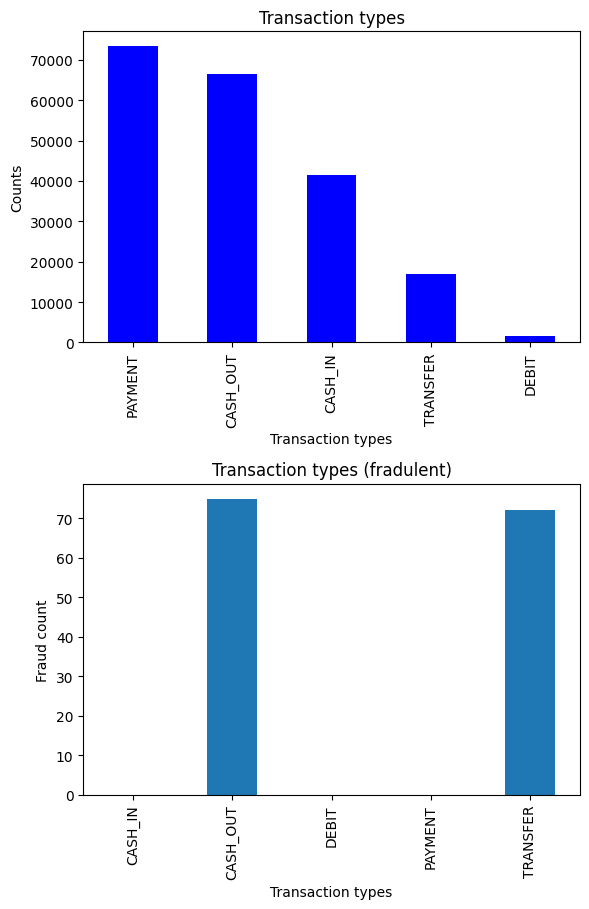

In [22]:
def visual_1(df):
    def transaction_counts(df):
        counts = df['type'].value_counts()
        return counts
    
    def transaction_counts_split_by_fraud(df):
        count_sum = df.groupby('type')['isFraud'].sum()
        return count_sum

    fig, axs = plt.subplots(2, figsize=(6,10))
    transaction_counts(df).plot(ax=axs[0], kind='bar', color='blue')
    axs[0].set_title('Transaction types')
    axs[0].set_xlabel('Transaction types')
    axs[0].set_ylabel('Counts')
    transaction_counts_split_by_fraud(df).plot(ax=axs[1], kind='bar')
    axs[1].set_title('Transaction types (fradulent)')
    axs[1].set_xlabel('Transaction types')
    axs[1].set_ylabel('Fraud count')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    return 'graphs done'

visual_1(df)


'Amount v isFraud'

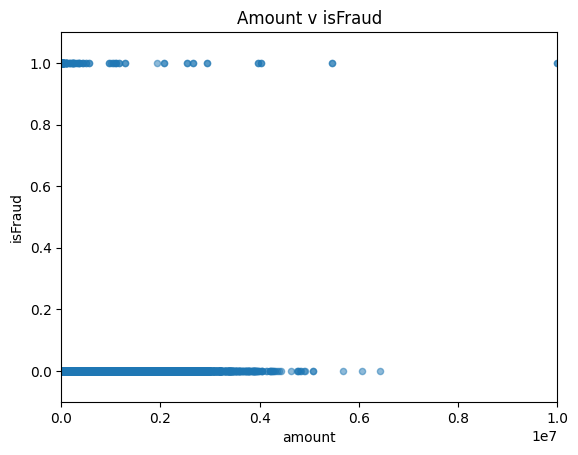

In [11]:
def visual_2(df):
    def query(df):
        return df[['amount', 'isFraud']]
    
    plot = query(df).plot.scatter(x='amount',y='isFraud', alpha=0.5)
    plot.set_title('Amount v isFraud')
    # plot.set_xlim(left=-100, right=1e3)
    plot.set_xlim(left=df['amount'].min() - 100, right=df['amount'].max() + 100)
    plot.set_ylim(bottom=-0.1, top=1.1)
    return 'Amount v isFraud'

visual_2(df)


Use your newly-gained Pandas skills to find an insight from the dataset. You have full flexibility to go in whichever direction interests you. Please create a visual as above for this query. `visual_custom` should call `exercise_custom`.

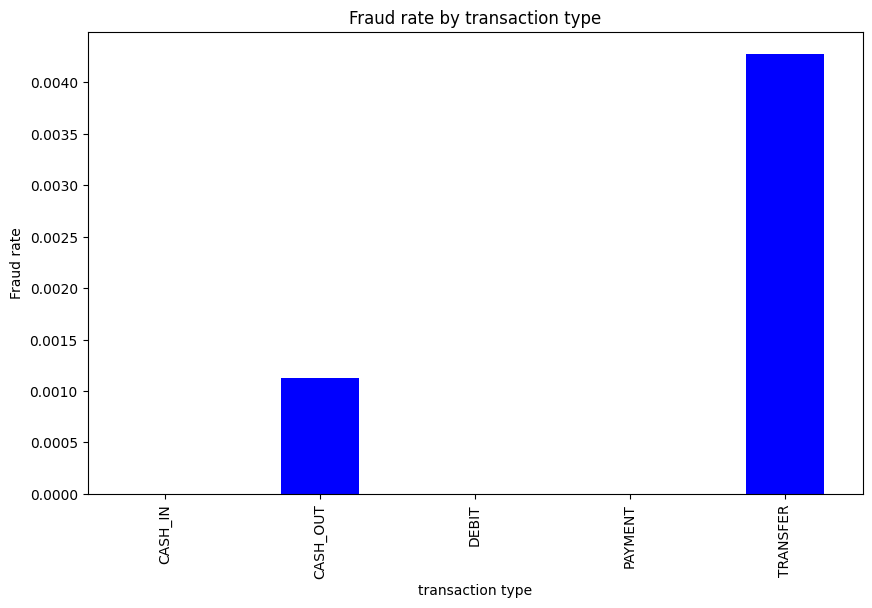

In [15]:
def exercise_custom(df):
    fraud_rate = df.groupby('type')['isFraud'].mean()
    plt.figure(figsize=(10, 6))
    fraud_rate.plot(kind='bar', color='blue')
    plt.title('Fraud rate by transaction type')
    plt.xlabel('transaction type')
    plt.ylabel('Fraud rate')
    plt.show()
    
def visual_custom(df):
    exercise_custom(df)

visual_custom(df)

Submission

1. Copy the exercises into `task1.py`.
2. Upload `task1.py` to Forage.

All done!

Your work will be instrumental for our team's continued success.